In [1]:
#!pip install librosa

In [2]:
#!pip install resampy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# to display audio wave

import IPython.display as ipd
import librosa
import librosa.display

# I. Introduction

### Audio Classification of Urban Sounds

<div class="alert alert-block alert-info" style="font-size:15px; color:black; background-color:#e6f2ff; border-color: #3399ff">
    <aside>
    <p>
Audio classification is a crucial task in many applications, including speech recognition, music genre classification, and environmental sound classification. This project focuses on the classification of urban sounds using machine learning techniques. The dataset used for this task is the **UrbanSound8K dataset**, which contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air conditioner, car horn, children playing, dog bark, drilling, engine idling, gunshot, jackhammer, siren, and street music.
 </p>
         <p>
The goal of this project is to build a robust model that can accurately classify these urban sounds into their respective categories. To achieve this, we will extract relevant features from the audio data, use these features to train a machine learning model, and evaluate the model's performance.
 </p>

 </aside>
</div>

<!-- -->

# 1. Project Steps:

<div class="steps" style="font-size:15px; color:black; background-color:#F5F5F5;">
    <aside>
<p>//    1. <b>Data Exploration and Visualization</b>  Loading the dataset and vizualizing the audio data</p>
<p>// 2. <b>Audio Data Preprocessing</b> Loading audio files using Librosa and visualizing waveforms</p>
<p>// 3. <b>Feature Extraction</b> Extracting Mel Frequency Cepstral Coefficients (MFCC) from audio data and defining a feature extraction function</p>
<p>// 4. <b>Data Preparation</b> Iterating through audio files, extracting features, converting to DataFrame, splitting dataset, and encoding labels</p>
<p>// 5. <b>Model Building</b> Defining and compiling a neural network model using TensorFlow/Keras</p>
<p>// 6. <b>Model Training</b> Splitting data into training and testing sets, training the model, validating the model, and saving the best model</p>
<p>// 7. <b>Model Evaluation</b> Evaluating the model's performance on the test set and printing the test accuracy</p>
<p>// 8. <b>Model Prediction</b> Extracting features from a new audio sample, using the trained model to predict the class, and printing the predicted class</p>
 </aside>
</div>

<!-- -->

# 2. About the Dataset

The **UrbanSound8K** dataset is widely used for training and evaluating machine learning models for environmental sound classification.It is a collection of 8,732 labeled sound excerpts (≤4s) from urban environments, classified into 10 categories:

<!-- -->

<!-- -->


| classId |       Class       | classId |       Class       |
|---------|-------------------|---------|-------------------|
|    0    | air_conditioner   |    5    | engine_idling     |
|    1    | car_horn          |    6    | gun_shot          |
|    2    | children_playing  |    7    | jackhammer        |
|    3    | dog_bark          |    8    | siren             |
|    4    | drilling          |    9    | street_music      |

The metadata file contains information about audio slices from the UrbanSound8K dataset, including file names, identifiers, temporal details (start and end times), salience, fold (cross-validation split), class IDs, and corresponding class labels for urban sound classification tasks.


| slice_file_name      | fsID   | start | end      | salience | fold | classID | class            |
|----------------------|--------|-------|----------|----------|------|---------|------------------|
| 100032-3-0-0.wav     | 100032 | 0.0   | 0.317551 | 1        | 5    | 3       | dog_bark         |
| 100263-2-0-117.wav   | 100263 | 58.5  | 62.5     | 1        | 5    | 2       | children_playing |
| 100263-2-0-121.wav   | 100263 | 60.5  | 64.5     | 1        | 5    | 2       | children_playing |
| 100263-2-0-126.wav   | 100263 | 63.0  | 67.0     | 1        | 5    | 2       | children_playing |
| 100263-2-0-137.wav   | 100263 | 68.5  | 72.5     | 1        | 5    | 2       | children_playing |

# II. EDA

Exploring a random audio sample `132016-9-0-6.wav` by printing the values of : 
* **Sample rate (sr)** : defines the number of samples per second taken from a analog signal to make adigital signal.
* **Amplitude**  : a measure of how high or low the wave extends from the x axis

In [5]:
filename = '/Users/macos/Desktop/Drdo/Audio_Classification/UrbanSound8K/audio/fold1/132016-9-0-6.wav'

In [6]:
lib_audio_data, sample_rate = librosa.load(filename)

In [7]:
lib_audio_data

array([-0.07869472, -0.11024831, -0.08400878, ..., -0.00586693,
        0.00208374,  0.01869803], dtype=float32)

In [8]:
sample_rate

22050

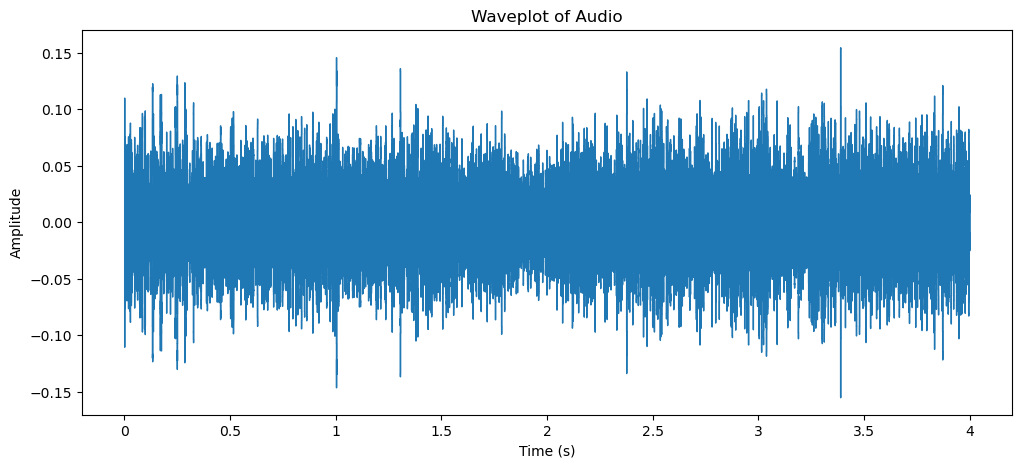

In [9]:
plt.figure(figsize=(12, 5))
librosa.display.waveshow(lib_audio_data, sr=sample_rate)
plt.title('Waveplot of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Extracting Feautures

<font size="4">Mel Frequency Cepstral Coefficients (MFCC) </font> 

In [10]:
mfcc = librosa.feature.mfcc(y=lib_audio_data,sr=sample_rate,n_mfcc=40)
print(mfcc.shape)

(40, 173)


In [11]:
audio_dataset_path='UrbanSound8K/audio/'

In [12]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm
import os

# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [03:50, 16.36it/s]/Users/macos/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [09:04, 25.43it/s]/Users/macos/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/macos/anaconda3/lib/python3.11/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:27, 15.39it/s]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [16]:
### Split the dataset into labels and target
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [17]:
X.shape

(8732, 40)

In [18]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [19]:
### Label Encoding

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

2024-07-11 09:26:51.614797: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665213e+00, -1.36902380e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352815e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641091e-01,  7.33490884e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [23]:
X_train.shape

(6985, 40)

In [24]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y_train.shape

(6985, 10)

In [26]:
y_test.shape

(1747, 10)

# Model

## ANN

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [29]:
num_labels=y.shape[1]

In [30]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
208/219 [===========================>..] - ETA: 0s - loss: 9.4144 - accuracy: 0.1217 
Epoch 1: val_loss improved from inf to 2.29045, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 9.0972 - accuracy: 0.1223 - val_loss: 2.2905 - val_accuracy: 0.1362
Epoch 2/100
 30/219 [===>..........................] - ETA: 0s - loss: 2.6968 - accuracy: 0.1229

/Users/macos/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


201/219 [==========================>...] - ETA: 0s - loss: 2.5089 - accuracy: 0.1314
Epoch 2: val_loss improved from 2.29045 to 2.28096, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.5008 - accuracy: 0.1331 - val_loss: 2.2810 - val_accuracy: 0.1191
Epoch 3/100
206/219 [===========================>..] - ETA: 0s - loss: 2.3417 - accuracy: 0.1314
Epoch 3: val_loss improved from 2.28096 to 2.27051, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3381 - accuracy: 0.1316 - val_loss: 2.2705 - val_accuracy: 0.1191
Epoch 4/100
217/219 [============================>.] - ETA: 0s - loss: 2.2784 - accuracy: 0.1424
Epoch 4: val_loss improved from 2.27051 to 2.22334, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2780 - accuracy: 0.1426 - val_loss: 2.2233 - val_accuracy: 0.1557
Epoch 5

219/219 [==============================] - 1s 3ms/step - loss: 1.4022 - accuracy: 0.5194 - val_loss: 1.1933 - val_accuracy: 0.6216
Epoch 27/100
213/219 [============================>.] - ETA: 0s - loss: 1.3775 - accuracy: 0.5285
Epoch 27: val_loss improved from 1.17591 to 1.14578, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.3789 - accuracy: 0.5271 - val_loss: 1.1458 - val_accuracy: 0.6400
Epoch 28/100
210/219 [===========================>..] - ETA: 0s - loss: 1.3449 - accuracy: 0.5348
Epoch 28: val_loss improved from 1.14578 to 1.13373, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.3476 - accuracy: 0.5333 - val_loss: 1.1337 - val_accuracy: 0.6325
Epoch 29/100
206/219 [===========================>..] - ETA: 0s - loss: 1.3313 - accuracy: 0.5481
Epoch 29: val_loss did not improve from 1.13373
219/219 [==============================] - 1s 3ms

Epoch 52/100
207/219 [===========================>..] - ETA: 0s - loss: 1.1034 - accuracy: 0.6341
Epoch 52: val_loss improved from 0.92190 to 0.89834, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1023 - accuracy: 0.6331 - val_loss: 0.8983 - val_accuracy: 0.7098
Epoch 53/100
204/219 [==========================>...] - ETA: 0s - loss: 1.1251 - accuracy: 0.6238
Epoch 53: val_loss did not improve from 0.89834
219/219 [==============================] - 1s 3ms/step - loss: 1.1252 - accuracy: 0.6248 - val_loss: 0.9299 - val_accuracy: 0.7029
Epoch 54/100
209/219 [===========================>..] - ETA: 0s - loss: 1.1186 - accuracy: 0.6249
Epoch 54: val_loss did not improve from 0.89834
219/219 [==============================] - 1s 3ms/step - loss: 1.1208 - accuracy: 0.6242 - val_loss: 0.9088 - val_accuracy: 0.7121
Epoch 55/100
209/219 [===========================>..] - ETA: 0s - loss: 1.1072 - accuracy: 0.6205
Epoch 55: v

216/219 [============================>.] - ETA: 0s - loss: 1.0183 - accuracy: 0.6561
Epoch 80: val_loss did not improve from 0.81414
219/219 [==============================] - 1s 3ms/step - loss: 1.0187 - accuracy: 0.6557 - val_loss: 0.8297 - val_accuracy: 0.7338
Epoch 81/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0237 - accuracy: 0.6617
Epoch 81: val_loss did not improve from 0.81414
219/219 [==============================] - 1s 3ms/step - loss: 1.0267 - accuracy: 0.6608 - val_loss: 0.8589 - val_accuracy: 0.7212
Epoch 82/100
212/219 [============================>.] - ETA: 0s - loss: 1.0510 - accuracy: 0.6502
Epoch 82: val_loss did not improve from 0.81414
219/219 [==============================] - 1s 3ms/step - loss: 1.0503 - accuracy: 0.6497 - val_loss: 0.8766 - val_accuracy: 0.7207
Epoch 83/100
210/219 [===========================>..] - ETA: 0s - loss: 1.0220 - accuracy: 0.6568
Epoch 83: val_loss did not improve from 0.81414
219/219 [===========================

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7475672364234924


In [35]:
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)
prediction = model.predict(prediction_feature)
predicted_class = np.argmax(prediction, axis=1)

print(predicted_class)

1/1 [==============================] - 0s 102ms/step
[9]
